## Probability for Datascience

In [221]:
pip install prob140

Note: you may need to restart the kernel to use updated packages.


In [222]:
pip install datascience

Note: you may need to restart the kernel to use updated packages.


In [223]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [224]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


## Topics:
    Theory
    - What is Probability?
    - Terminology in probability
    - Types of probability
    - Events in probability
    - Axioms/Theorems in probability
    - Probability of Tossing Coins
    - Probability of Rolling Dice
    - Probability of Drawing Cards
    Concept
    - Calculate Probability and distribution
    - Equality in Distributions
    - Joint Distributions
    - Marginal Distributions
    - Conditional Distributions
    - Dependence and Independence of two Events
    - Inclusion principles
    - Binomial Distribution
    - Multinomial Distribution
    - Law of Small numbers
    - Poisson Distribution
    - Poissonization
    - Expectation
    - Additivity
    - Markov Chains & problems

##### What is Probability?

Probability can be defined as the ratio of the number of favorable outcomes to the total number of outcomes of an event. For an experiment having 'n' number of outcomes, the number of favorable outcomes can be denoted by x. The formula to calculate the probability of an event is as follows.

    Probability(Event) = Favorable Outcomes/Total Outcomes = x/n



Theory: 

    Ref: https://statanalytica.com/blog/types-of-probability/ and 
    https://www.cuemath.com/data/probability/
    https://www.data8.org/datascience/reference-nb/datascience-reference.html#Table-Functions-and-Methods
    https://en.wikipedia.org/wiki/Probability_axioms

##### Types of probability: 

    Classical Probability : often referred to as the "priori" or "theoretical probability", states that in an experiment where there are B equally likely outcomes, and event X has exactly A of these outcomes, then the probability of X is A/B, or P(X) = A/B. For example, when a fair die is rolled, there are six possible outcomes that are equally likely. That means, there is a 1/6 probability of rolling each number on the die.
    
    Empirical Probability : The empirical probability or the experimental perspective evaluates probability through thought experiments. For example, if a weighted die is rolled, such that we don't know which side has the weight, then we can get an idea for the probability of each outcome by rolling the die number of times and calculating the proportion of times the die gives that outcome and thus find the probability of that outcome.
    
    Subjective Probability : Subjective probability considers an individual's own belief of an event occurring. For example, the probability of a particular team winning a football match on a fan's opinion is more dependent upon their own belief and feeling and not on a formal mathematical calculation.
    
    Axiomatic Probability : In axiomatic probability, a set of rules or axioms by Kolmogorov are applied to all the types. The chances of occurrence or non-occurrence of any event can be quantified by the applications of these axioms, given as:
    
i. The smallest possible probability is zero, and the largest is one   
ii. 
An event that is certain has a probability equal toone
iii. 
Any two mutually exclusive events cannot occur simultaneously, while the union of events says only one of them can occur.

In probability theory, a *random variable* is a numerical function defined on an outcome space.

In [230]:
import warnings
warnings.filterwarnings("ignore")

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

### 1. Functions on Sample/outcome Space

Random sampling can be thought of as repeated random trials, and therefore many outcome spaces consist of sequences. An outcome space representing two tosses of a coin is

$$ 
\Omega = \{ HH, HT, TH, TT \}
$$

If you were tossing 10 times, the outcome space would consist of the $2^{10}$ sequences of 10 elements where each element is H or T. The outcomes are a pain to list by hand, but computers are good at saving us that kind of pain.

#### Product Spaces ####
The *product* of two sets $A$ and $B$ is the set of all pairs $(a, b)$ where $a \in A$ and $b \in B$. This concept is exactly what we need to describe spaces representing multiple trials.

For example, the space representing the outcome of one toss of a coin is $\Omega_1 = \{ H, T \}$. The *product* of $\Omega_1$ with itself is the set of pairs $(H, H)$, $(H, T)$, $(T, H)$, and $(T, T)$, which you will recognize as the outcomes of two tosses of a coin. The product of this new space and $\Omega_1$ is the space representing three tosses. And so on.

The Python module `itertools` contains a function `product` that constructs product spaces. Let's import it.

In [234]:
from itertools import product

one_toss = make_array('H', 'T')

two_tosses = list(product(one_toss, repeat=2))
one_toss, two_tosses

(array(['H', 'T'],
       dtype='<U1'),
 [('H', 'H'), ('H', 'T'), ('T', 'H'), ('T', 'T')])

In [235]:
three_tosses = list(product(one_toss, repeat=3))
three_tosses

[('H', 'H', 'H'),
 ('H', 'H', 'T'),
 ('H', 'T', 'H'),
 ('H', 'T', 'T'),
 ('T', 'H', 'H'),
 ('T', 'H', 'T'),
 ('T', 'T', 'H'),
 ('T', 'T', 'T')]

#### Probability Space ####
A *probability space* is an outcome space accompanied by the probabilities of all the outcomes. If you assume all eight outcomes of three tosses are equally likely, the probabilities are all 1/8:

In [237]:
three_toss_probs = (1/8)*np.ones(8)

In [238]:
np.ones(8)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [239]:
#Corresponding probability space
three_toss_space = Table().with_columns(
    'omega', three_tosses,
    'P(omega)', three_toss_probs
)

For Dice rolled 5 times in a row with 6 sides

Product spaces get large very quickly. If you roll a die 5 times, there are almost 8,000 possible outcomes:

In [241]:
6**5

7776

But we have `product` so we can still list them all! Here is a probability space representing 5 rolls of a die.

In [243]:
die = np.arange(1, 7, 1)

five_rolls = list(product(die, repeat=5))  # All possible results of 5 rolls

five_rolls_probs = (1/6**5)**np.ones(6**5)  # Each result has chance 1/6**5

five_rolls_space = Table().with_columns(
   'omega', five_rolls,
    'P(omega)', five_rolls_probs
)

five_rolls_space

omega,P(omega)
[1 1 1 1 1],0.000128601
[1 1 1 1 2],0.000128601
[1 1 1 1 3],0.000128601
[1 1 1 1 4],0.000128601
[1 1 1 1 5],0.000128601
[1 1 1 1 6],0.000128601
[1 1 1 2 1],0.000128601
[1 1 1 2 2],0.000128601
[1 1 1 2 3],0.000128601
[1 1 1 2 4],0.000128601


The sum of the rolls is a numerical function on the outcome space $\Omega$ of five rolls. The sum is thus a *random variable*. Let's call it $S$. Then, formally,

$$
S: \Omega \rightarrow \{ 5, 6, \ldots, 30 \}
$$

The range of $S$ is the integers 5 through 30, because each die shows at least one spot and at most six spots. We can also use the equivalent notation

$$
\Omega \stackrel{S}{\rightarrow} \{ 5, 6, \ldots, 30 \}
$$

Formally, an **outcome space** is just a set, usually denoted by $\Omega$. That's the upper case Greek letter Omega. 

In [246]:
five_rolls_sum = five_rolls_space.with_columns(
    'S(omega)', five_rolls_space.apply(sum, 'omega')
).move_to_end('P(omega)')

five_rolls_sum

omega,S(omega),P(omega)
[1 1 1 1 1],5,0.000128601
[1 1 1 1 2],6,0.000128601
[1 1 1 1 3],7,0.000128601
[1 1 1 1 4],8,0.000128601
[1 1 1 1 5],9,0.000128601
[1 1 1 1 6],10,0.000128601
[1 1 1 2 1],6,0.000128601
[1 1 1 2 2],7,0.000128601
[1 1 1 2 3],8,0.000128601
[1 1 1 2 4],9,0.000128601


In [247]:
five_rolls_sum.where('S(omega)', are.equal_to(10))

omega,S(omega),P(omega)
[1 1 1 1 6],10,0.000128601
[1 1 1 2 5],10,0.000128601
[1 1 1 3 4],10,0.000128601
[1 1 1 4 3],10,0.000128601
[1 1 1 5 2],10,0.000128601
[1 1 1 6 1],10,0.000128601
[1 1 2 1 5],10,0.000128601
[1 1 2 2 4],10,0.000128601
[1 1 2 3 3],10,0.000128601
[1 1 2 4 2],10,0.000128601


There are 126 values of $\omega$ for which $S(\omega) = 10$. Since all the $\omega$ are equally likely, the chance that $S$ has the value 10 is 126/7776. 

We will usually be informal with notation and write $\{ S = 10 \}$ instead of $\{ S \in \{10\} \}$:

$$
P(S = 10) = \frac{126}{7776} = 1.62\%
$$

In [284]:
126*0.000128601

0.016203725999999998

### 2. Distributions

In [250]:
dist_S = five_rolls_sum.drop('omega').group('S(omega)', sum)
dist_S

S(omega),P(omega) sum
5,0.000128601
6,0.000643004
7,0.00192901
8,0.00450103
9,0.00900206
10,0.0162037
11,0.0263632
12,0.0392233
13,0.0540123
14,0.0694444


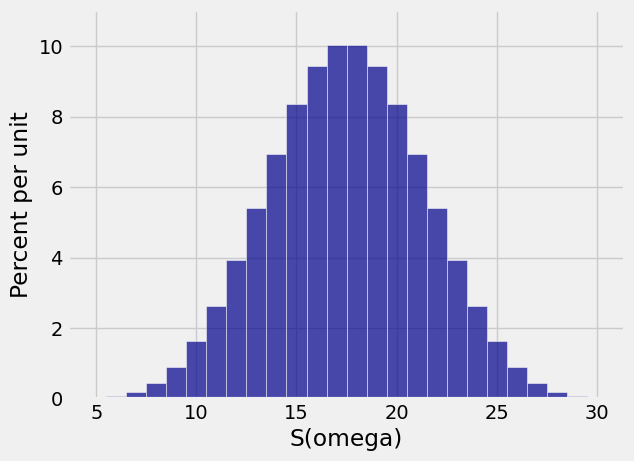

In [251]:
Plot(dist_S)

the interval between the points of inflection of the bell curve contains about 68% of the area of the curve. Though the histogram above isn't exactly a bell curve – it is a discrete histogram with only 26 bars


In [253]:
s = dist_S.column(0)
p_s = dist_S.column(1)
dist_S = Table().values(s).probabilities(p_s)
dist_S

Value,Probability
5,0.000128601
6,0.000643004
7,0.00192901
8,0.00450103
9,0.00900206
10,0.0162037
11,0.0263632
12,0.0392233
13,0.0540123
14,0.0694444


The `event` method takes one argument specifying the event. It displays the rows of the distribution table corresponding to `event` and also the probability of the event.

To find $P(14 \le S \le 21)$, use `event` as follows.

In [255]:
dist_S.where('Value', are.between(14,22))

Value,Probability
14,0.0694444
15,0.0837191
16,0.0945216
17,0.100309
18,0.100309
19,0.0945216
20,0.0837191
21,0.0694444


In [256]:
dist_S.where('Value', are.between(14,22)).column('Probability').sum()

0.6959876543209863

The chance is 69.6%, not very far from our estimate of around 68%.

To find the numerical value of the probability without displaying all the outcomes in the event, use `event` as above and put a semi-colon at the end of the line. This suppresses the table display.

In [258]:
dist_S.where('Value', are.between(20,31)).column('Probability').sum()

0.30516975308642041

In [259]:
dist_S.where('Value', are.between(4,17)).column('Probability').sum()

0.39969135802469169